<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

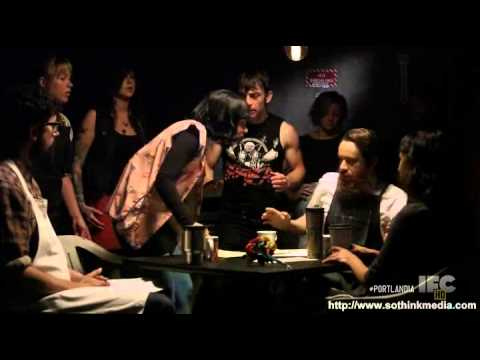

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [11]:
import pandas as pd
from pandas_profiling import ProfileReport

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [14]:
# Start here
shops.columns

Index(['coffee_shop_name', 'full_review_text', 'star_rating'], dtype='object')

In [16]:
import spacy

nlp = spacy.load('en_core_web_md')



Exception ignored in: <function tqdm.__del__ at 0x7fdc368506a8>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Unit_4/lib/python3.7/site-packages/tqdm/std.py", line 1152, in __del__
    self.close()
  File "/opt/anaconda3/envs/Unit_4/lib/python3.7/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7fdc368506a8>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Unit_4/lib/python3.7/site-packages/tqdm/std.py", line 1152, in __del__
    self.close()
  File "/opt/anaconda3/envs/Unit_4/lib/python3.7/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7fdc368506a8>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Unit_4/lib/python3.7/site-p

In [80]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee'])

spacy_tokens = []

# Tokenize the text reviews

for doc in nlp.pipe(shops['full_review_text']):
    doc_tokens = []
    for t in doc:
        if (t.text.lower() not in STOP_WORDS) & (t.is_punct == False) & (len(t.text) > 2):
            doc_tokens.append(t.text)
    spacy_tokens.append(doc_tokens)



In [81]:
df = shops.copy()
df['review_tokenized'] = spacy_tokens
df.head()

,coffee_shop_name,full_review_text,star_rating,review_tokenized
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check, Love, love, loved, atmosph..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, Listed, Date, Night, Austin, Ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check, Listed, Brunch, Spots, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor, Good, drinks, Nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check, located, Northcross, mall, ..."


In [61]:
import re

# get the ratings as the first 3 characters in df['star_rating']
ratings = []

df['ratings'] = df['star_rating'].apply(lambda x: re.sub('[a-zA-Z ]', '', x))
df[['ratings', 'star_rating']]
df['ratings'] = df['ratings'].astype(float)

<AxesSubplot:xlabel='ratings', ylabel='Count'>

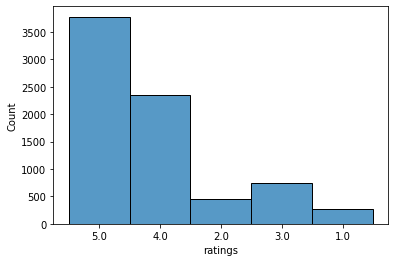

In [49]:
# EDA

df.coffee_shop_name.unique()

import seaborn as sns
sns.histplot(df['ratings'])



In [68]:
### Analysing the coffee shops by rating
import numpy as np

# Average rating per restaraunt
df_unique = pd.DataFrame(df['coffee_shop_name'].unique(), columns=['coffee_shop_name'])

avg_ratings = [np.mean(df[df['coffee_shop_name'] == x]['ratings']) for x in df_unique['coffee_shop_name']]
df_unique['avg_ratings'] = avg_ratings



# adding number of ratings

count = [len(df[df['coffee_shop_name'] == x]['ratings']) for x in df_unique['coffee_shop_name']]
df_unique['num_ratings'] = count
df_unique.sort_values(by='avg_ratings', ascending=False)

,coffee_shop_name,avg_ratings,num_ratings
1,The Marvelous Vintage Tea Party Co.,5.000000,10
71,Lola Savannah Coffee Downtown,5.000000,4
20,Mañana Coffee & Juice,4.848485,33
10,Brian’s Brew,4.844444,45
27,Third Coast Coffee Roasting Company,4.821429,56
...,...,...,...
61,Stinson’s,3.810000,100
59,Kick Butt Coffee Music & Booze,3.720000,100
63,Pacha,3.690000,100
64,"Strange Brew, Austin Coffee",3.600000,100


In [84]:
### Analysing the coffee shops by tokens
from collections import Counter

def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()

    # stores the number of docs that each token appears in
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])

    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

count(df['review_tokenized'])

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
137,place,3640,5401,1.0,0.015533,0.015533,0.477941
227,good,2573,3585,2.0,0.010310,0.025843,0.337841
25,check,3100,3284,3.0,0.009444,0.035287,0.407038
175,like,2098,3026,4.0,0.008702,0.043989,0.275473
136,great,2277,2975,5.0,0.008556,0.052545,0.298976
...,...,...,...,...,...,...,...
23094,roomier,1,1,23095.0,0.000003,0.999988,0.000131
23093,windowed,1,1,23096.0,0.000003,0.999991,0.000131
23096,actuality,1,1,23097.0,0.000003,0.999994,0.000131
23095,crass,1,1,23098.0,0.000003,0.999997,0.000131


### Now it's time to lemmatize the tokens



In [99]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee'])

def get_lemmas(text):
    doc_lemmas = []
    for doc in nlp.pipe(text):
        lemmas = []
        for token in doc:
            if ((t.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.pos_ != 'PRON')):
                lemmas.append(token.lemma_.lower())
        doc_lemmas.append(lemmas)

df['token_lemmas'] = df['full_review_text'].apply(get_lemmas)

cols = ['full_review_text', 'token_lemmas']
df[cols].head()

KeyboardInterrupt: 

In [ ]:
import squarify
import matplotlib.pyplot as plt

wc = count(df['token_lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [93]:
df.columns

Index(['coffee_shop_name', 'full_review_text', 'star_rating',
       'review_tokenized'],
      dtype='object')

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

